<a href="https://colab.research.google.com/github/jperdomos/Natural-Language-Processing-NLP/blob/main/notebooks/SPAMNOSPAMPLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url = "https://raw.githubusercontent.com/juacardonahe/Curso_NLP/refs/heads/main/data/SMSSpamCollection/SMSSpamCollection"

In [ ]:
import pandas as pd
import urllib.request
data=urllib.request.urlopen(url)

In [ ]:
data

In [ ]:
lines_split=[line.decode().strip().split('\t')for line in data] #Separar el texto y el clasificador spam y no spam
df=pd.DataFrame(lines_split,columns=['label','texty']) #Convertir a dataframe
df

,label,texty
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df['label'].unique() ##Spam y no Spam

array(['ham', 'spam'], dtype=object)

In [ ]:
sample_features = df.copy()

In [ ]:
sample_features['lenght']= df['texty'].apply(len) #Cantidad de caracteres
sample_features['number_punctuation']=df['texty'].apply(lambda x: sum(1 for letter in x if letter in '".,;:!?¿¡()_-*')) #Cantidad de signos de puntuacion
sample_features['number_uppercase']=df['texty'].apply(lambda x: sum(1 for letter in x if letter !=letter.lower())) #
sample_features['number_numbers']=df['texty'].apply(lambda x: sum(1 for letter in x if letter in '01234567889')) #Cantidad de numeros
sample_features['number_x']=df['texty'].apply(lambda x: sum(1 for letter in x if letter in 'Xx')) #Cantidad de X
sample_features['is_spam']=df['label']=='spam' #True o false SPAM

In [ ]:
sample_features

,label,texty,lenght,number_punctuation,number_uppercase,number_numbers,number_x,is_spam
0,ham,"Go until jurong point, crazy.. Available only ...",111,9,3,0,0,False
1,ham,Ok lar... Joking wif u oni...,29,6,2,0,0,False
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,3,10,25,2,True
3,ham,U dun say so early hor... U c already then say...,49,6,2,0,0,False
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,1,2,0,0,False
...,...,...,...,...,...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,160,8,9,21,0,True
5570,ham,Will ü b going to esplanade fr home?,36,1,1,0,0,False
5571,ham,"Pity, * was in mood for that. So...any other s...",57,7,2,0,0,False
5572,ham,The guy did some bitching but I acted like i'd...,125,0,2,0,1,False


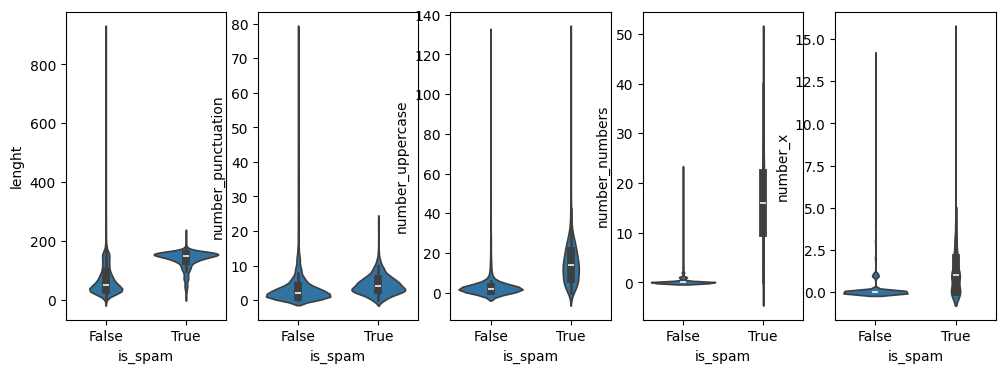

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 5, figsize=(12, 4))
sns.violinplot(sample_features,x='is_spam',y='lenght',ax=axs[0])
sns.violinplot(sample_features,x='is_spam',y='number_punctuation',ax=axs[1])
sns.violinplot(sample_features,x='is_spam',y='number_uppercase',ax=axs[2])
sns.violinplot(sample_features,x='is_spam',y='number_numbers',ax=axs[3])
sns.violinplot(sample_features,x='is_spam',y='number_x',ax=axs[4])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

train, test = train_test_split(sample_features, test_size=0.2, random_state=123)
features=['lenght','number_punctuation','number_uppercase','number_numbers','number_x']
model=LogisticRegression()
model.fit(train[features],train['is_spam'])
test_prediction=model.predict(test[features])
print('Precision:  ',precision_score(test['is_spam'],test_prediction))
print('F1:  ' ,f1_score(test['is_spam'],test_prediction))
print('Recall:  ',recall_score(test['is_spam'],test_prediction))
print('Accuracy:  ',accuracy_score(test['is_spam'],test_prediction))

Precision:   0.9513888888888888
F1:   0.9042904290429042
Recall:   0.8616352201257862
Accuracy:   0.9739910313901345


In [ ]:
df.loc[123,'texty']

'Todays Voda numbers ending 7548 are selected to receive a $350 award. If you have a match please call 08712300220 quoting claim code 4041 standard rates app'

In [ ]:
df.iloc[123]

,123
label,spam
texty,Todays Voda numbers ending 7548 are selected t...


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import spacy
nlp=spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import re
import string
from nltk.corpus import stopwords

EN_STOPWORDS=set(stopwords.words('english'))
PUNCTUATION = str.maketrans('', '', string.punctuation)

def basic_tokenize(text):
  doc=nlp(text)
  return [t.text for t in doc if not t.is_space]

def to_lower(tokens):
  return [t.lower() for t in tokens]

def strip_punc(tokens):
  return [t.translate(PUNCTUATION) for t in tokens]

def remove_stopwords(tokens, stop=EN_STOPWORDS):
  return [t for t in tokens if t not in stop]

def normalize(text):
  tokens=basic_tokenize(text)
  tokens=to_lower(tokens)
  tokens=strip_punc(tokens)
  tokens=remove_stopwords(tokens)
  return tokens

In [ ]:
normalize(df.iloc[123]['texty'])

['todays',
 'voda',
 'numbers',
 'ending',
 '7548',
 'selected',
 'receive',
 '',
 '350',
 'award',
 '',
 'match',
 'please',
 'call',
 '08712300220',
 'quoting',
 'claim',
 'code',
 '4041',
 'standard',
 'rates',
 'app']

In [ ]:
df['normalized'] = df['texty'].apply(normalize)


In [ ]:
df['normalized'].head()


,normalized
0,"[go, jurong, point, , crazy, , available, bugi..."
1,"[ok, lar, , joking, wif, u, oni, ]"
2,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,"[u, dun, say, early, hor, , u, c, already, say, ]"
4,"[nah, nt, think, goes, usf, , lives, around, t..."
